In [1]:

import h5py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm

base_path = '/home/turbotage/Documents/4DRecon/'

with h5py.File(base_path + 'image_320.h5', 'r') as f:
    image = f['image'][()]




In [2]:
plt.rcParams['figure.figsize'] = [11, 11]

In [3]:
img = np.abs(image[0,...])

img = np.transpose(img[185,:,:], (1,0))

In [4]:
fimg = np.fft.fftshift(img)
fimg = np.fft.fft2(fimg)
fimg = np.fft.ifftshift(fimg)
fimg = np.abs(fimg)
#fimg = fimg - fimg.max()
fimg = fimg ** 0.25


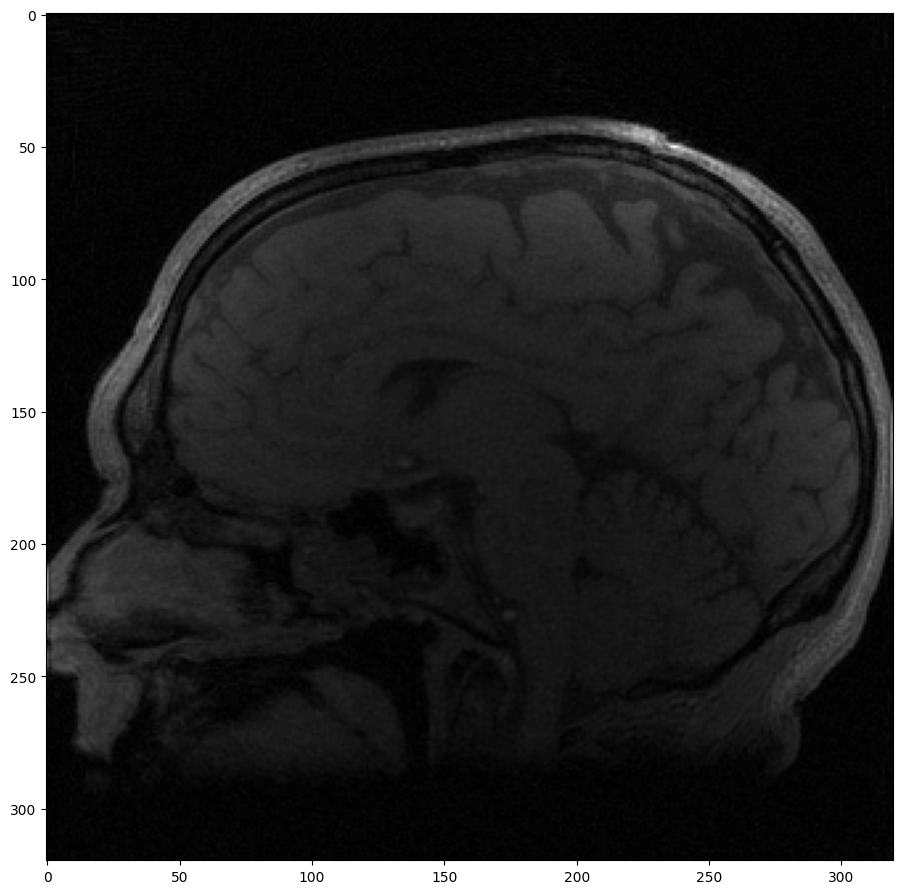

In [5]:
plt.figure(1)
plt.imshow(img, cmap='gray')
plt.show()

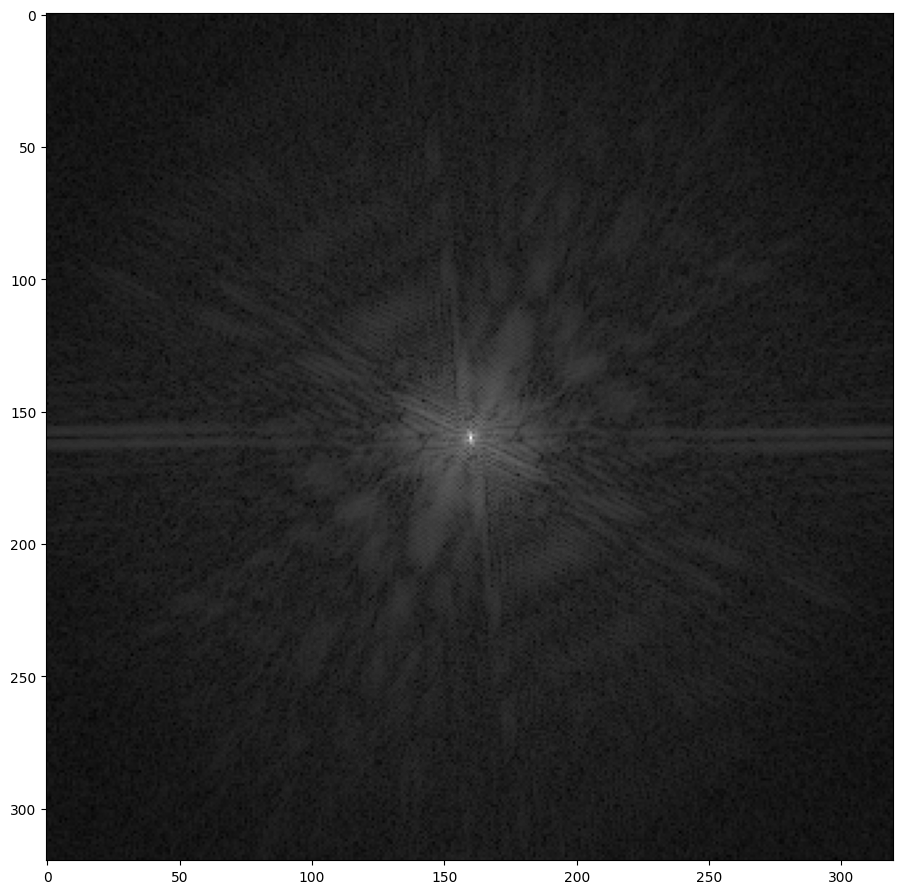

In [6]:
plt.figure(2)
plt.imshow(fimg, cmap='gray')
plt.show()

In [7]:
def rotate_line(x, y, theta):
    R = [[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]
    for i in range(x.shape[0]):
        x[i], y[i] = np.dot(R, [x[i], y[i]])

    return x, y

def radial_line(nupts=100):
    x = np.linspace(0, 1, nupts)
    y = np.zeros((nupts,))

    return x, y

def spiral_line(anglespeed, nupts=100):
    x = np.empty((nupts,))
    y = np.empty((nupts,))

    for i in range(x.shape[0]):
        r = i / nupts
        y[i] = r*(np.sin(anglespeed * r) + np.cos(anglespeed * r))
        x[i] = r*(np.cos(anglespeed * r) - np.sin(anglespeed * r))

    return x, y

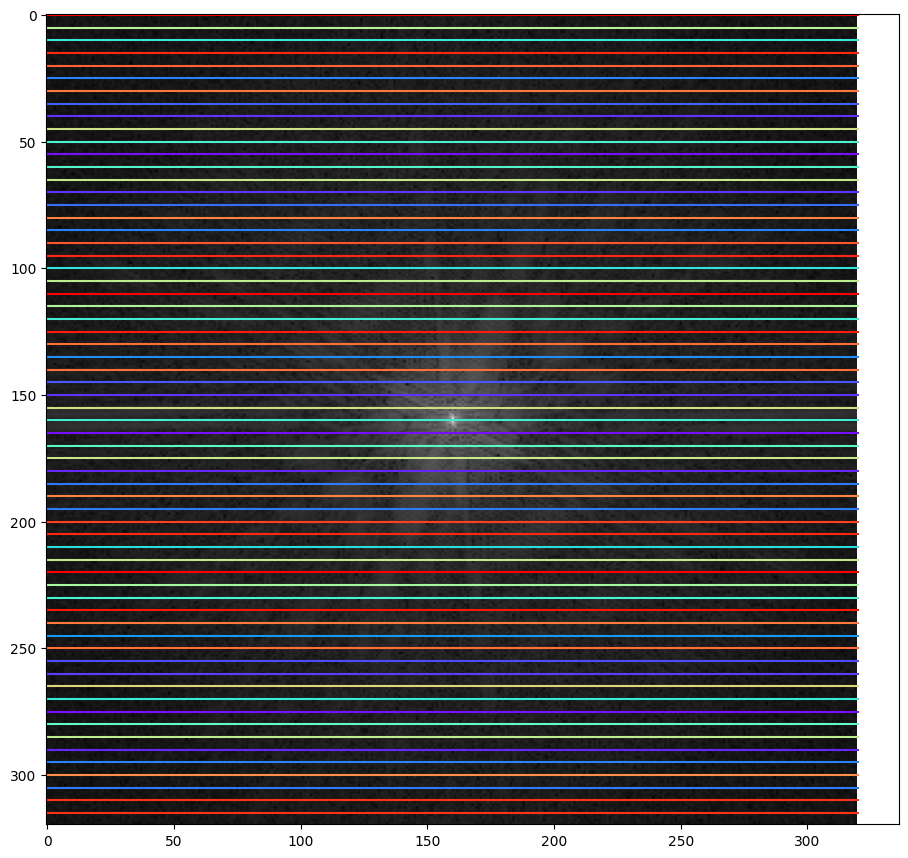

In [8]:
plt.figure(2)
plt.imshow(fimg, cmap='gray')
nlines = 64
color = cm.rainbow(np.linspace(0, 1, nlines))
for i in range(nlines):
    x, y = radial_line()
    x = 320*x
    y = 320*y + (320 / nlines)*i

    plt.plot(x, y, c=color[int(0.99*nlines*np.cos(128*i/nlines))])
plt.show()

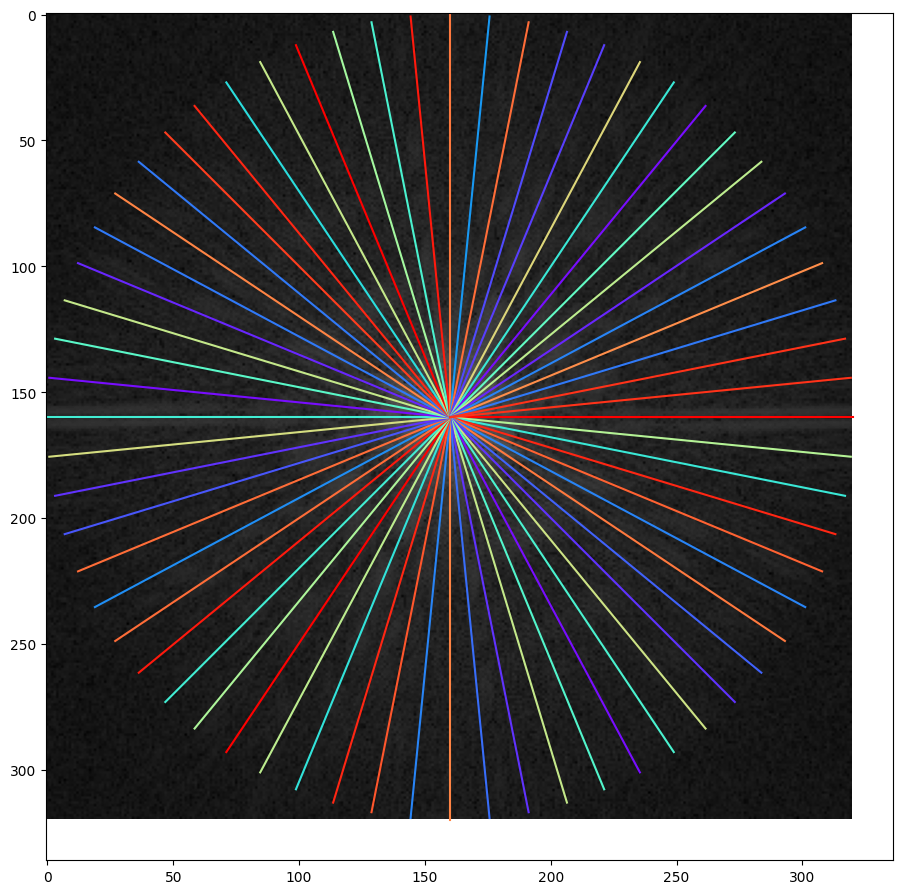

In [9]:
plt.figure(2)
plt.imshow(fimg, cmap='gray')
nlines = 64
color = cm.rainbow(np.linspace(0, 1, nlines))
for i in range(nlines):
    x, y = radial_line()
    x, y = rotate_line(x, y, i * np.pi / (nlines // 2))
    x = 160*x + 160
    y = 160*y + 160

    plt.plot(x, y, c=color[int(0.99*nlines*np.cos(128*i/nlines))])
plt.show()

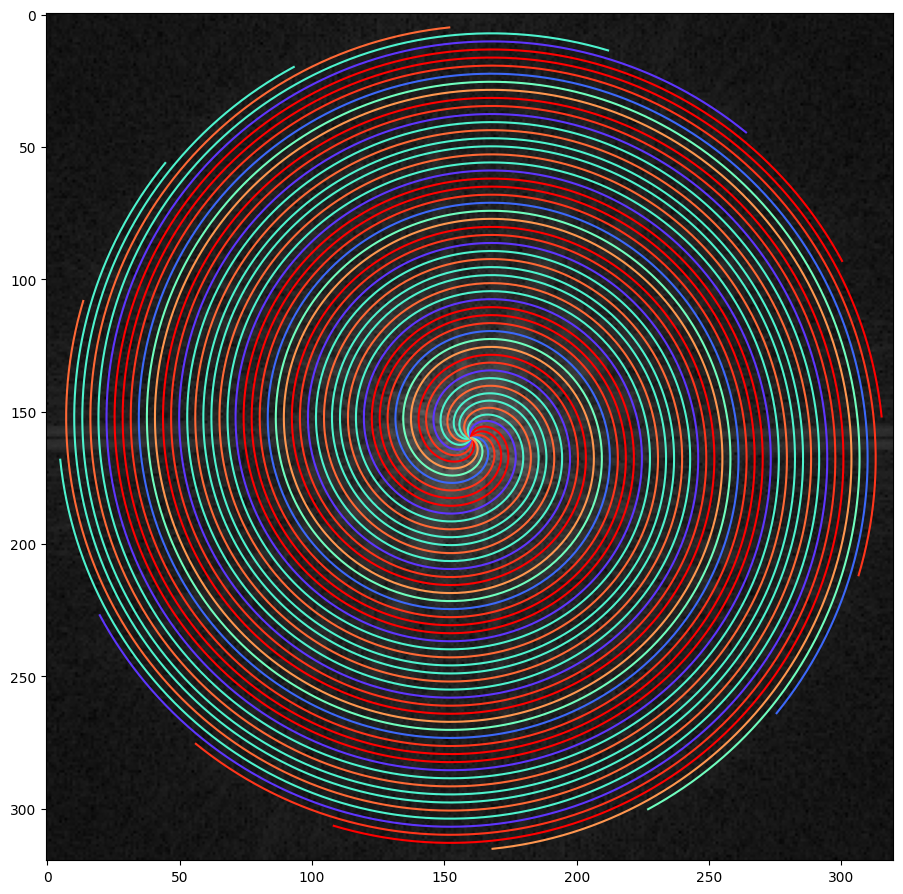

In [10]:
plt.figure(2)
plt.imshow(fimg, cmap='gray')
nlines = 16
color = cm.rainbow(np.linspace(0, 1, nlines))
for i in range(nlines):
    x, y = spiral_line(20, 800)
    x, y = rotate_line(x, y, i * np.pi / (nlines // 2))
    x = 110*x + 160
    y = 110*y + 160

    plt.plot(x, y, c=color[int(0.99*nlines*np.cos(128*i/nlines))])
plt.show()